In [1]:
import os
import random
import time
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import tqdm

In [2]:
#这部分已经分好词的话就不用做了
def load_preprocess(path):
    # 正式开始，首先是读取文件
    with open(path, 'r', errors='ignore') as f:
        lines = f.readlines()
    # 第二部分，去除其中的非文本部分
    stop = set(stopwords.words('english')) 
    res = []
    wnl = WordNetLemmatizer()
    for data in lines:
        data = data.replace('\n', '')
        filter_sentence = [w for w in data.split(' ') if w not in stopwords.words('english') and w != '' and (not w.isdigit())]
        # 第四部分，词型还原
        filter_sentence = [wnl.lemmatize(i) for i in filter_sentence]
        text = ' '.join(filter_sentence)
        res.append(text)
    return res

In [3]:
def process_data(data_path):
    
    text = load_preprocess(data_path)
    
    return text

In [4]:
# with open('./wiki.txt','r',encoding='utf8') as f:
#     lines = f.readlines()
# tar = './wiki_sep.txt'
# tar = open(tar,'w',encoding='utf8')
# stop = set(stopwords.words('english'))
# wnl = WordNetLemmatizer()
# for line in tqdm.tqdm(lines):
#     data = line.replace('/n','')
#     filter_sentence = [w for w in data.split(' ') if w not in stopwords.words('english') and w != '' and (not w.isdigit())]
#     filter_sentence = [wnl.lemmatize(i) for i in filter_sentence]
#     text = ' '.join(filter_sentence)
#     tar.writelines(text)

In [23]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')# 忽略警告

import logging
import os.path
import sys
import multiprocessing

from gensim.corpora import WikiCorpus
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
    
program = os.path.basename(sys.argv[0])
logger = logging.getLogger(program)

logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s',level=logging.INFO)
logger.info("running %s" % ' '.join(sys.argv))

# inp为输入语料, outp1 为输出模型, outp2为原始c版本word2vec的vector格式的模型
inp = './pubmed_sep.txt'
outp1 = './pubmed.model'
outp2 = './pubmed.vector'

# 训练skip-gram模型
model = Word2Vec(LineSentence(inp), vector_size=400, window=5, min_count=5,
                 workers=multiprocessing.cpu_count())

# 保存模型
model.save(outp1)
model.wv.save_word2vec_format(outp2, binary=False)

2021-05-26 02:58:38,616: INFO: running /home/lthpc/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/dzh/.local/share/jupyter/runtime/kernel-8b5b92bf-b3e7-44d2-9ffe-e4d9eb4ddf95.json
2021-05-26 02:58:38,618: INFO: collecting all words and their counts
2021-05-26 02:58:38,620: INFO: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-05-26 02:58:38,784: INFO: PROGRESS: at sentence #10000, processed 319616 words, keeping 22228 word types
2021-05-26 02:58:38,940: INFO: PROGRESS: at sentence #20000, processed 702170 words, keeping 32802 word types
2021-05-26 02:58:39,124: INFO: PROGRESS: at sentence #30000, processed 1147862 words, keeping 41186 word types
2021-05-26 02:58:39,296: INFO: PROGRESS: at sentence #40000, processed 1570010 words, keeping 47392 word types
2021-05-26 02:58:39,438: INFO: PROGRESS: at sentence #50000, processed 1981996 words, keeping 53350 word types
2021-05-26 02:58:39,564: INFO: PROGRESS: at sentence #60000, processed 2314055 

2021-05-26 02:58:52,864: INFO: EPOCH 1 - PROGRESS: at 33.04% examples, 580817 words/s, in_qsize 77, out_qsize 0
2021-05-26 02:58:53,902: INFO: EPOCH 1 - PROGRESS: at 38.08% examples, 588545 words/s, in_qsize 94, out_qsize 0
2021-05-26 02:58:54,919: INFO: EPOCH 1 - PROGRESS: at 43.32% examples, 600615 words/s, in_qsize 92, out_qsize 0
2021-05-26 02:58:55,923: INFO: EPOCH 1 - PROGRESS: at 48.34% examples, 610122 words/s, in_qsize 93, out_qsize 0
2021-05-26 02:58:57,068: INFO: EPOCH 1 - PROGRESS: at 53.11% examples, 611822 words/s, in_qsize 95, out_qsize 0
2021-05-26 02:58:58,069: INFO: EPOCH 1 - PROGRESS: at 56.59% examples, 607200 words/s, in_qsize 95, out_qsize 0
2021-05-26 02:58:59,094: INFO: EPOCH 1 - PROGRESS: at 60.94% examples, 608489 words/s, in_qsize 92, out_qsize 2
2021-05-26 02:59:00,107: INFO: EPOCH 1 - PROGRESS: at 65.39% examples, 616733 words/s, in_qsize 89, out_qsize 1
2021-05-26 02:59:01,123: INFO: EPOCH 1 - PROGRESS: at 69.92% examples, 618289 words/s, in_qsize 93, out_

2021-05-26 02:59:26,871: INFO: worker thread finished; awaiting finish of 47 more threads
2021-05-26 02:59:26,874: INFO: worker thread finished; awaiting finish of 46 more threads
2021-05-26 02:59:26,895: INFO: worker thread finished; awaiting finish of 45 more threads
2021-05-26 02:59:26,907: INFO: worker thread finished; awaiting finish of 44 more threads
2021-05-26 02:59:26,913: INFO: worker thread finished; awaiting finish of 43 more threads
2021-05-26 02:59:26,916: INFO: worker thread finished; awaiting finish of 42 more threads
2021-05-26 02:59:26,933: INFO: worker thread finished; awaiting finish of 41 more threads
2021-05-26 02:59:26,936: INFO: worker thread finished; awaiting finish of 40 more threads
2021-05-26 02:59:26,940: INFO: worker thread finished; awaiting finish of 39 more threads
2021-05-26 02:59:26,965: INFO: worker thread finished; awaiting finish of 38 more threads
2021-05-26 02:59:26,987: INFO: worker thread finished; awaiting finish of 37 more threads
2021-05-26

2021-05-26 02:59:47,475: INFO: worker thread finished; awaiting finish of 30 more threads
2021-05-26 02:59:47,478: INFO: worker thread finished; awaiting finish of 29 more threads
2021-05-26 02:59:47,481: INFO: worker thread finished; awaiting finish of 28 more threads
2021-05-26 02:59:47,493: INFO: worker thread finished; awaiting finish of 27 more threads
2021-05-26 02:59:47,496: INFO: worker thread finished; awaiting finish of 26 more threads
2021-05-26 02:59:47,518: INFO: worker thread finished; awaiting finish of 25 more threads
2021-05-26 02:59:47,522: INFO: worker thread finished; awaiting finish of 24 more threads
2021-05-26 02:59:47,528: INFO: worker thread finished; awaiting finish of 23 more threads
2021-05-26 02:59:47,537: INFO: worker thread finished; awaiting finish of 22 more threads
2021-05-26 02:59:47,544: INFO: worker thread finished; awaiting finish of 21 more threads
2021-05-26 02:59:47,551: INFO: worker thread finished; awaiting finish of 20 more threads
2021-05-26

2021-05-26 03:00:08,090: INFO: worker thread finished; awaiting finish of 12 more threads
2021-05-26 03:00:08,091: INFO: worker thread finished; awaiting finish of 11 more threads
2021-05-26 03:00:08,091: INFO: worker thread finished; awaiting finish of 10 more threads
2021-05-26 03:00:08,098: INFO: worker thread finished; awaiting finish of 9 more threads
2021-05-26 03:00:08,100: INFO: worker thread finished; awaiting finish of 8 more threads
2021-05-26 03:00:08,101: INFO: worker thread finished; awaiting finish of 7 more threads
2021-05-26 03:00:08,103: INFO: worker thread finished; awaiting finish of 6 more threads
2021-05-26 03:00:08,106: INFO: worker thread finished; awaiting finish of 5 more threads
2021-05-26 03:00:08,107: INFO: worker thread finished; awaiting finish of 4 more threads
2021-05-26 03:00:08,110: INFO: worker thread finished; awaiting finish of 3 more threads
2021-05-26 03:00:08,111: INFO: worker thread finished; awaiting finish of 2 more threads
2021-05-26 03:00:0

2021-05-26 03:00:28,583: INFO: Word2Vec lifecycle event {'params': 'Word2Vec(vocab=50380, vector_size=400, alpha=0.025)', 'datetime': '2021-05-26T03:00:28.583733', 'gensim': '4.0.1', 'python': '3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]', 'platform': 'Linux-4.4.0-186-generic-x86_64-with-glibc2.10', 'event': 'created'}
2021-05-26 03:00:28,638: INFO: Word2Vec lifecycle event {'fname_or_handle': './pubmed.model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2021-05-26T03:00:28.638933', 'gensim': '4.0.1', 'python': '3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]', 'platform': 'Linux-4.4.0-186-generic-x86_64-with-glibc2.10', 'event': 'saving'}
2021-05-26 03:00:28,640: INFO: storing np array 'vectors' to ./pubmed.model.wv.vectors.npy
2021-05-26 03:00:28,707: INFO: storing np array 'syn1neg' to ./pubmed.model.syn1neg.npy
2021-05-26 03:00:28,762: INFO: not storing attribute cum_table
2021-05-26 03:00:28,785: INFO: saved ./pubmed.model
2021-05

In [72]:
import gensim

In [133]:
model = gensim.models.KeyedVectors.load_word2vec_format('./wikipedia-pubmed-and-PMC-w2v.bin', binary=True)

2021-05-30 03:09:08,798: INFO: loading projection weights from ./wikipedia-pubmed-and-PMC-w2v.bin
2021-05-30 03:10:06,166: INFO: KeyedVectors lifecycle event {'msg': 'loaded (5443656, 200) matrix of type float32 from ./wikipedia-pubmed-and-PMC-w2v.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2021-05-30T03:10:06.166759', 'gensim': '4.0.1', 'python': '3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]', 'platform': 'Linux-4.4.0-186-generic-x86_64-with-glibc2.10', 'event': 'load_word2vec_format'}


In [89]:
import pickle
with open('./word_list','rb')as f:
    word_list = pickle.load(f)

In [90]:
len(model.get_vector('hello'))

200

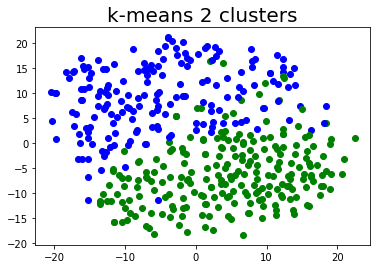

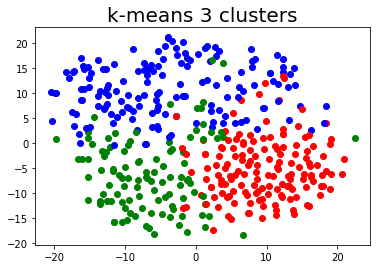

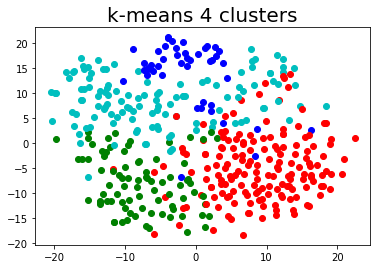

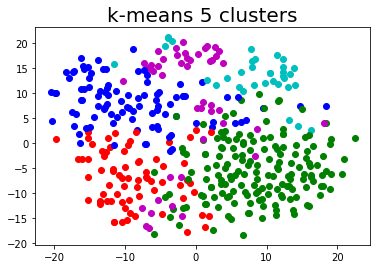

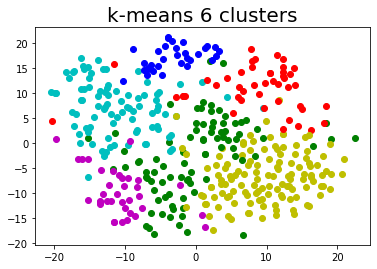

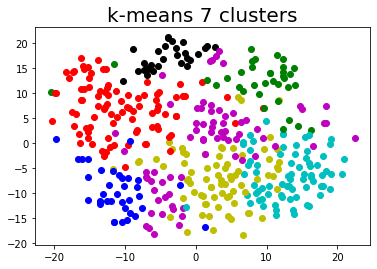

In [91]:
dataset = []
for word in word_list:
    try:
        dataset.append(model.get_vector(word))
    except:
        pass
dataset_embedded = TSNE(n_components=2, early_exaggeration=6).fit_transform(dataset)
        # for diff num of clusters, to do the cluster algorithm
for num_cluster in range(2, 8):
    # do the kmeans algorithm
    km_cluster = KMeans(n_clusters=num_cluster, max_iter=1000, init='k-means++')
    km_cluster.fit(dataset)
    # start draw the image
    cents = km_cluster.cluster_centers_  # the centroid

    labels = km_cluster.labels_
    mark = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    j = 0   # to count the point in the dataset

    for label in labels:
        plt.scatter(dataset_embedded[j][0], dataset_embedded[j][1], c=mark[label])
        j += 1
    plt.title('k-means '+str(num_cluster)+' clusters', fontsize=20)
    plt.savefig('./pretrained/' + str(num_cluster) + '_cluster.jpg')
    plt.show()

In [125]:
model.similar_by_word('elephant')

[('rhinoceros', 0.6024184823036194),
 ('giraffe', 0.5703033208847046),
 ('sumatran', 0.5575737357139587),
 ('leopard', 0.5486470460891724),
 ('hippopotamus', 0.5427892804145813),
 ('gorilla', 0.5323292016983032),
 ('crocodile', 0.5112906098365784),
 ('hyena', 0.5088824033737183),
 ('poacher', 0.48984700441360474),
 ('loxodonta', 0.48529931902885437)]

In [136]:
words= ['eye','ear','eyeball','mouth',"eyebrow","wrist","lip","hand","finger",'forehead','bike','biking','motorcycle','scotter','bicycle','motorbike','motorcross','bus','car','taxi','orange','banana','watermelon','pineapple','pear',"cherry",'lemon','coconut','apple','mango','chemistry','physics','biology','geophysics','microbiology',"ecology",'biochemistry','biophysics','immunology','history']
word1 = ['dog','elephant','lion','horse','cat','deer','monkey','frog','duck','rabbit']
words = words + word1

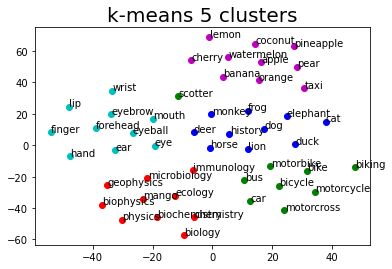

In [142]:
dataset = []
for word in words:
    try:
        dataset.append(model.get_vector(word))
    except:
        pass
dataset_embedded = TSNE(n_components=2, early_exaggeration=6).fit_transform(dataset)
        # for diff num of clusters, to do the cluster algorithm
for num_cluster in range(5, 6):
    # do the kmeans algorithm
    km_cluster = KMeans(n_clusters=num_cluster, max_iter=1000, init='k-means++')
    km_cluster.fit(dataset)
    # start draw the image
    cents = km_cluster.cluster_centers_  # the centroid

    labels = km_cluster.labels_
    mark = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    j = 0   # to count the point in the dataset

    for label in labels:
        plt.scatter(dataset_embedded[j][0], dataset_embedded[j][1], c=mark[label])
        plt.annotate(words[j],xy=(dataset_embedded[j][0], dataset_embedded[j][1]),xytext=(dataset_embedded[j][0]+0.1, dataset_embedded[j][1]+0.1))
        j += 1
    plt.title('k-means '+str(num_cluster)+' clusters', fontsize=20)
    plt.savefig('./pretrained/' + str(num_cluster) + '_cluster.jpg',dpi=500)
    plt.show()

In [92]:
model = gensim.models.KeyedVectors.load_word2vec_format('./wikipedia-pubmed-and-PMC-w2v.bin', binary=True)

2021-05-29 23:12:44,274: INFO: loading projection weights from ./wikipedia-pubmed-and-PMC-w2v.bin
2021-05-29 23:13:38,969: INFO: KeyedVectors lifecycle event {'msg': 'loaded (5443656, 200) matrix of type float32 from ./wikipedia-pubmed-and-PMC-w2v.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2021-05-29T23:13:38.969472', 'gensim': '4.0.1', 'python': '3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]', 'platform': 'Linux-4.4.0-186-generic-x86_64-with-glibc2.10', 'event': 'load_word2vec_format'}


True

In [97]:
train_feature=[]
for word in word_list:
    try:
        train_feature.append(model.get_vector(word))
    except:
        pass

In [98]:
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.metrics import silhouette_score ,calinski_harabasz_score,davies_bouldin_score
from sklearn.manifold import TSNE

In [101]:
for i in range(2,8):
    pred_kmeans_20 = KMeans(n_clusters=i, init='k-means++').fit_predict(train_feature)
    print('use normal kmeans with k={}:'.format(str(i)))
    print('silhouette_score = ', silhouette_score(train_feature, pred_kmeans_20))
    print('calinski_harabasz_score = ', calinski_harabasz_score(train_feature, pred_kmeans_20))
    print('davies_bouldin_score = ', davies_bouldin_score(train_feature, pred_kmeans_20))
    print('*'*20)

use normal kmeans with k=2:
silhouette_score =  0.09328131
calinski_harabasz_score =  35.14186389266479
davies_bouldin_score =  3.351744886235713
********************
use normal kmeans with k=3:
silhouette_score =  0.06392127
calinski_harabasz_score =  28.387461468094696
davies_bouldin_score =  3.3542433701116945
********************
use normal kmeans with k=4:
silhouette_score =  0.06704413
calinski_harabasz_score =  24.51316022101092
davies_bouldin_score =  3.084889058428164
********************
use normal kmeans with k=5:
silhouette_score =  0.08596048
calinski_harabasz_score =  21.921155952464844
davies_bouldin_score =  3.0033686064115956
********************
use normal kmeans with k=6:
silhouette_score =  0.056931186
calinski_harabasz_score =  19.41638285648102
davies_bouldin_score =  3.134913653834241
********************
use normal kmeans with k=7:
silhouette_score =  0.041042894
calinski_harabasz_score =  18.10698406478663
davies_bouldin_score =  3.174147935371439
*************

In [109]:
for i in range(2,30):
    print('use minibatch kmeans with k={}:'.format(str(i)))
    pred_minibatch_1000 = MiniBatchKMeans(n_clusters=i, init='k-means++', batch_size=2).fit_predict(train_feature)
    print('use minibatch kmeans with batch=2:')
    print('silhouette_score = ', silhouette_score(train_feature, pred_minibatch_1000))
    print('calinski_harabasz_score = ', calinski_harabasz_score(train_feature, pred_minibatch_1000))
    print('davies_bouldin_score = ', davies_bouldin_score(train_feature, pred_minibatch_1000))

    pred_minibatch_1500 = MiniBatchKMeans(n_clusters=i, init='k-means++', batch_size=3).fit_predict(train_feature)
    print('use minibatch kmeans with batch=3:')
    print('silhouette_score = ', silhouette_score(train_feature, pred_minibatch_1500))
    print('calinski_harabasz_score = ', calinski_harabasz_score(train_feature, pred_minibatch_1500))
    print('davies_bouldin_score = ', davies_bouldin_score(train_feature, pred_minibatch_1500))

    pred_minibatch_2000 = MiniBatchKMeans(n_clusters=i, init='k-means++', batch_size=5).fit_predict(train_feature)
    print('use minibatch kmeans with batch=5:')
    print('silhouette_score = ', silhouette_score(train_feature, pred_minibatch_2000))
    print('calinski_harabasz_score = ', calinski_harabasz_score(train_feature, pred_minibatch_2000))
    print('davies_bouldin_score = ', davies_bouldin_score(train_feature, pred_minibatch_2000))

    pred_minibatch_3000 = MiniBatchKMeans(n_clusters=i, init='k-means++', batch_size=10).fit_predict(train_feature)
    print('use minibatch kmeans with batch=10:')
    print('silhouette_score = ', silhouette_score(train_feature, pred_minibatch_3000))
    print('calinski_harabasz_score = ', calinski_harabasz_score(train_feature, pred_minibatch_3000))
    print('davies_bouldin_score = ', davies_bouldin_score(train_feature, pred_minibatch_3000))
    print('*'*20)

use minibatch kmeans with k=2:
use minibatch kmeans with batch=2:
silhouette_score =  0.09565832
calinski_harabasz_score =  14.649122046654963
davies_bouldin_score =  2.9089121080633293
use minibatch kmeans with batch=3:
silhouette_score =  0.057574086
calinski_harabasz_score =  33.992057998359115
davies_bouldin_score =  3.16897288221045
use minibatch kmeans with batch=5:
silhouette_score =  0.05536839
calinski_harabasz_score =  33.6372217988721
davies_bouldin_score =  3.153417898361691
use minibatch kmeans with batch=10:
silhouette_score =  0.14464185
calinski_harabasz_score =  13.977594883287464
davies_bouldin_score =  2.6635512555367584
********************
use minibatch kmeans with k=3:
use minibatch kmeans with batch=2:
silhouette_score =  0.032077607
calinski_harabasz_score =  2.6698150349523884
davies_bouldin_score =  1.7212329113347857
use minibatch kmeans with batch=3:
silhouette_score =  0.09285846
calinski_harabasz_score =  19.001354419916755
davies_bouldin_score =  2.700382

use minibatch kmeans with batch=5:
silhouette_score =  -0.068119116
calinski_harabasz_score =  8.596684530881838
davies_bouldin_score =  1.9882351520953627
use minibatch kmeans with batch=10:
silhouette_score =  -0.066064015
calinski_harabasz_score =  7.221915483683331
davies_bouldin_score =  2.0750463929401466
********************
use minibatch kmeans with k=15:
use minibatch kmeans with batch=2:
silhouette_score =  -0.008010132
calinski_harabasz_score =  8.180450270499412
davies_bouldin_score =  2.290831747248609
use minibatch kmeans with batch=3:
silhouette_score =  -0.021886518
calinski_harabasz_score =  7.5340869223617615
davies_bouldin_score =  2.417911122681091
use minibatch kmeans with batch=5:
silhouette_score =  -0.03209805
calinski_harabasz_score =  8.09132053891021
davies_bouldin_score =  2.253209009047563
use minibatch kmeans with batch=10:
silhouette_score =  0.01114482
calinski_harabasz_score =  8.861341670029459
davies_bouldin_score =  2.124997669997803
****************

use minibatch kmeans with batch=2:
silhouette_score =  -0.024217023
calinski_harabasz_score =  5.720923881126964
davies_bouldin_score =  1.8277983976671253
use minibatch kmeans with batch=3:
silhouette_score =  0.013113201
calinski_harabasz_score =  6.303913591173372
davies_bouldin_score =  2.0116105772690083
use minibatch kmeans with batch=5:
silhouette_score =  -0.005338549
calinski_harabasz_score =  6.774769303152662
davies_bouldin_score =  1.9826493417588475
use minibatch kmeans with batch=10:
silhouette_score =  -0.05072618
calinski_harabasz_score =  5.736340053691285
davies_bouldin_score =  2.0119639044553423
********************
use minibatch kmeans with k=28:
use minibatch kmeans with batch=2:
silhouette_score =  -0.02419681
calinski_harabasz_score =  5.571777187555898
davies_bouldin_score =  1.9825005023347624
use minibatch kmeans with batch=3:
silhouette_score =  0.009232772
calinski_harabasz_score =  6.340602165764719
davies_bouldin_score =  2.0847926080209978
use minibatch 